# TestCase 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config3.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 3
# version : big
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
largenet = False
if "largenet" in version:
    version = "medium" 
    largenet = True
# high_degree = 10

In [4]:
assert testcase == 3
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
if version != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)

Using device: cpu
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe3.pth
network loaded


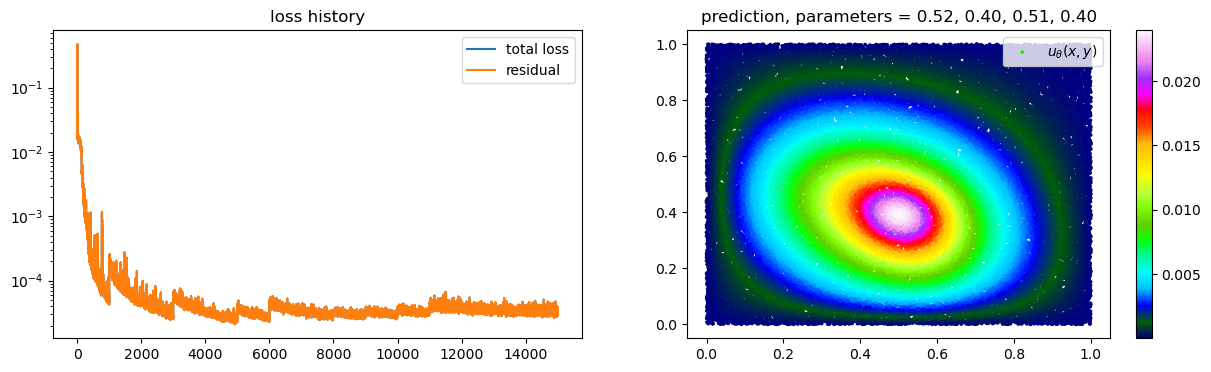

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


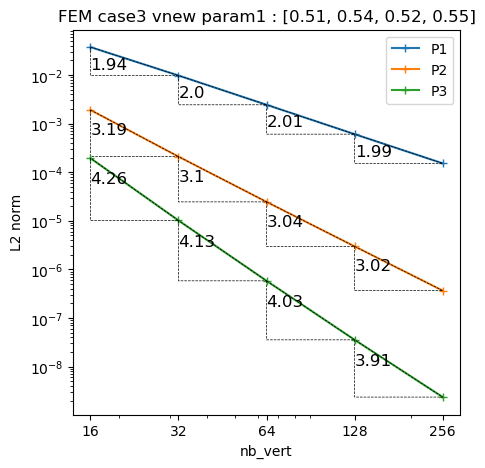

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree1.csv
## Run error estimation with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  2  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=7.396445631979614e-05
V created with  32  vertices and degree  2  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=8.081255273393372e-06
V created with  64  vertices and degree  2  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=9.354494287398371e-07
V created with  128  vertices and degree  2  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=1.1341929550648331e-07
V created with  256  vertices and degree  2  : h = 0.00554593553

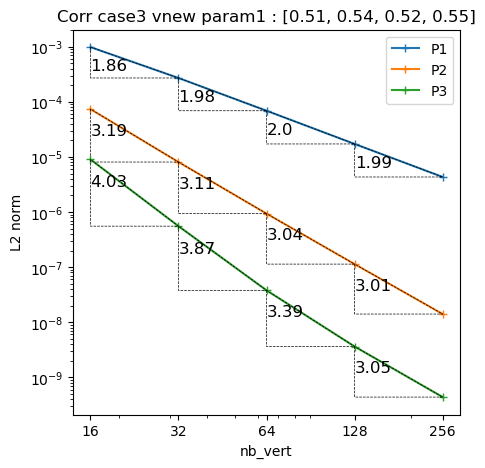

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Run Mult

In [16]:
tab_M = [0.0,0.1,1.0,100.0]

In [17]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  1  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=0.002729163124609689
V created with  32  vertices and degree  1  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=0.0011276874727465683
V created with  64  vertices and degree  1  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=0.0004932957976667766
V created with  128  vertices and degree  1  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=0.00022841120422266483
V created with  256  vertices and degree  1  : h = 0.005545935538718157
f is considered for new version
nb_vert=256, norme_L2=0.00010959757363889393
## Run error estimation with Mult for degree=1
V_ex 

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
## Run error estimation with Mult for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  2  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=0.0009248498530588805
V created with  32  vertices and degree  2  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=0.0004094737623540674
V created with  64  vertices and degree  2  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=0.00019311043190215678
V created with  128  vertices and degree  2  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=9.384566105828238e-05
V created with  256  vertices and degree  2  : h = 0.005545

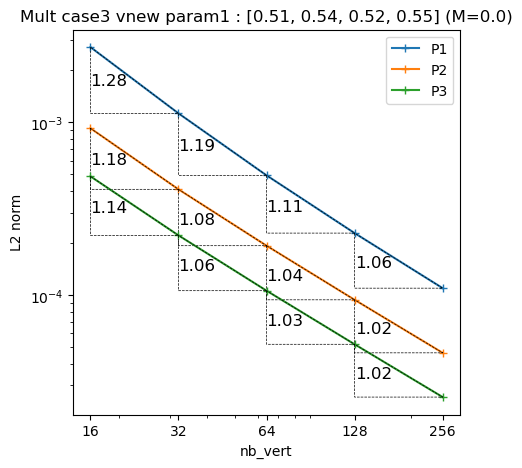

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
## Run error estimation with Mult for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  2  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=7.273803660645725e-05
V created with  32  vertices and degree  2  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=7.858569026984647e-06
V created with  64  vertices and degree  2  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=9.072676887708543e-07
V created with  128  vertices and degree  2  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=1.0997906427466628e-07
V created with  256  vertices and degree  2  : h = 0.005545

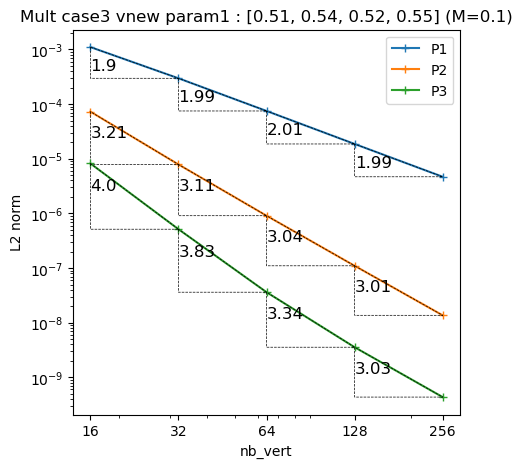

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
## Run error estimation with Mult for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  2  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=7.344509748064767e-05
V created with  32  vertices and degree  2  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=8.018966230978637e-06
V created with  64  vertices and degree  2  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=9.286846128772232e-07
V created with  128  vertices and degree  2  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=1.1263267309249029e-07
V created with  256  vertices and degree  2  : h = 0.005545

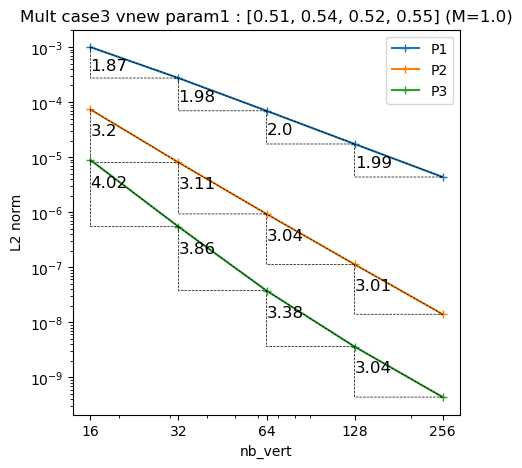

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M100.0.csv
## Run error estimation with Mult for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
V created with  16  vertices and degree  2  : h = 0.09428090415820647
f is considered for new version
nb_vert=16, norme_L2=7.395744239826541e-05
V created with  32  vertices and degree  2  : h = 0.045619792334616084
f is considered for new version
nb_vert=32, norme_L2=8.08051357945195e-06
V created with  64  vertices and degree  2  : h = 0.02244783432338254
f is considered for new version
nb_vert=64, norme_L2=9.35371805822895e-07
V created with  128  vertices and degree  2  : h = 0.01113553986120561
f is considered for new version
nb_vert=128, norme_L2=1.1341132519637741e-07
V created with  256  vertices and degree  2  : h = 0.005545

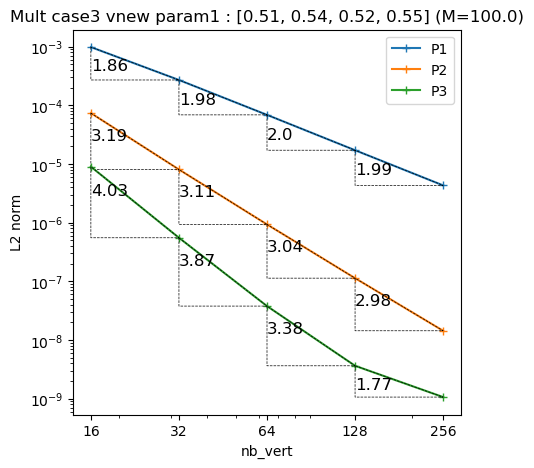

In [18]:
error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


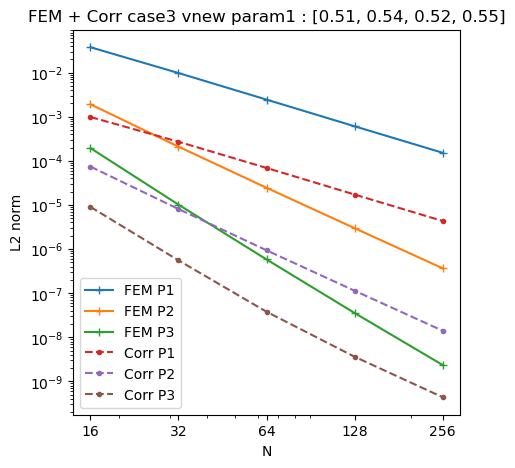

In [19]:
compare_methods.plot_Corr_vs_FEM_alldeg()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


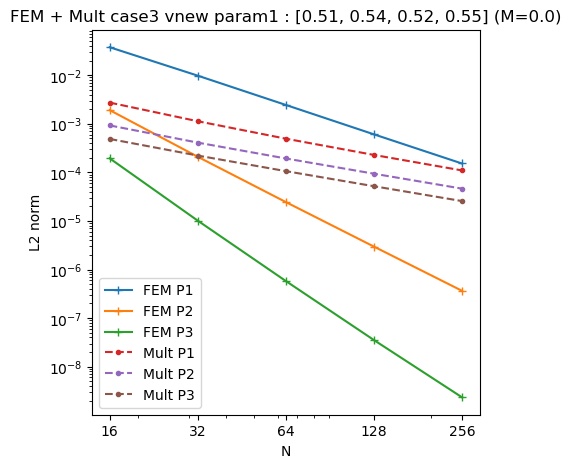

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


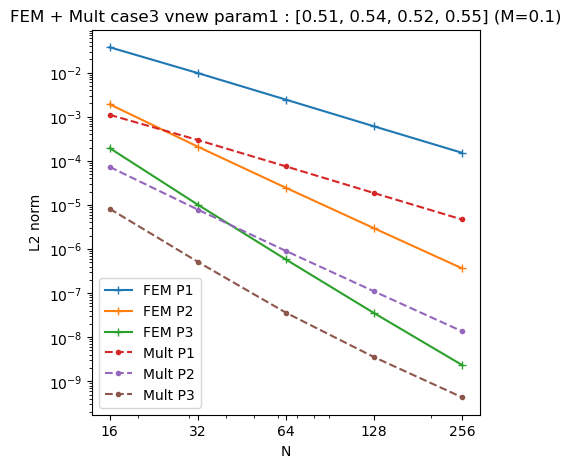

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


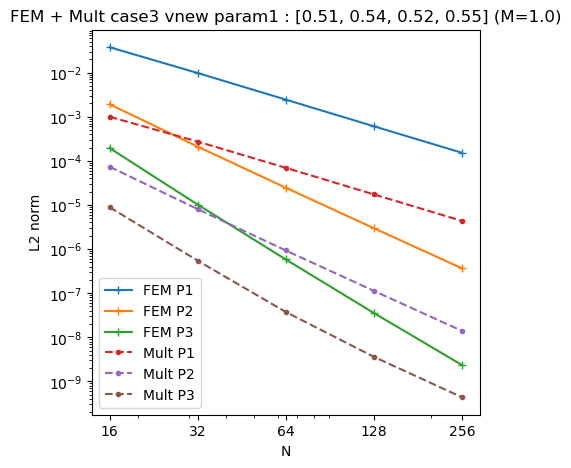

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


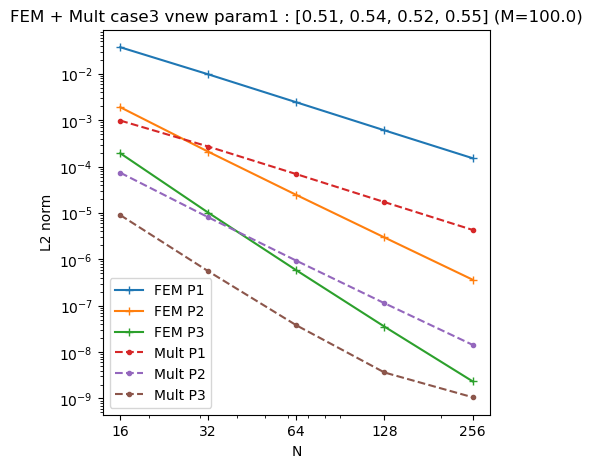

In [20]:
compare_methods.plot_Mult_vs_FEM_alldeg_allM(tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
Mult weak P1 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
Mult weak P1 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
Mult weak P1 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M100.0.csv
Mult weak P1 M100.0 not found


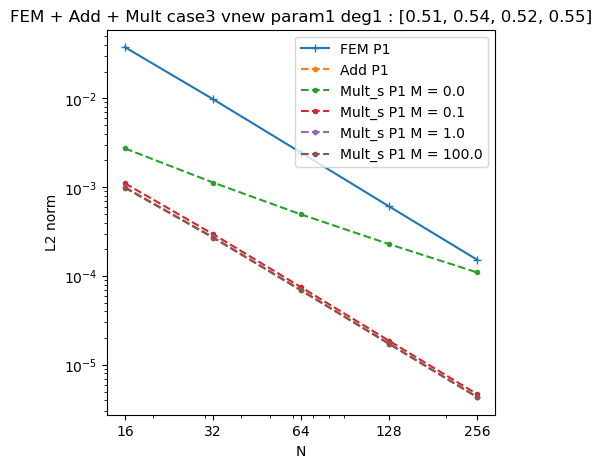

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.0.csv
Mult weak P2 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.1.csv
Mult weak P2 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M1.0.csv
Mult weak P2 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M100.0.csv
Mult weak P2 M100.0 not found


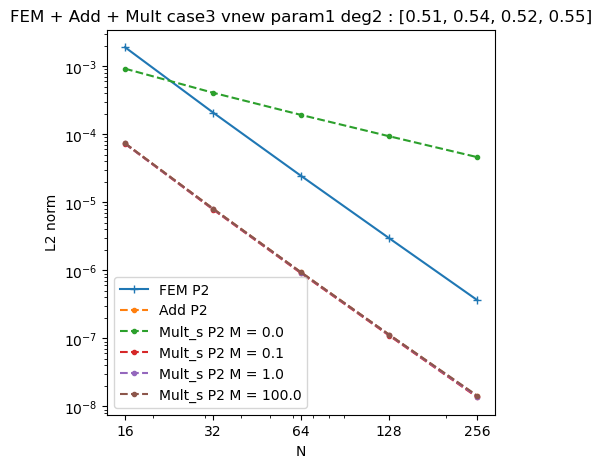

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.0.csv
Mult weak P3 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.1.csv
Mult weak P3 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M1.0.csv
Mult weak P3 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M100.0.csv
Mult weak P3 M100.0 not found


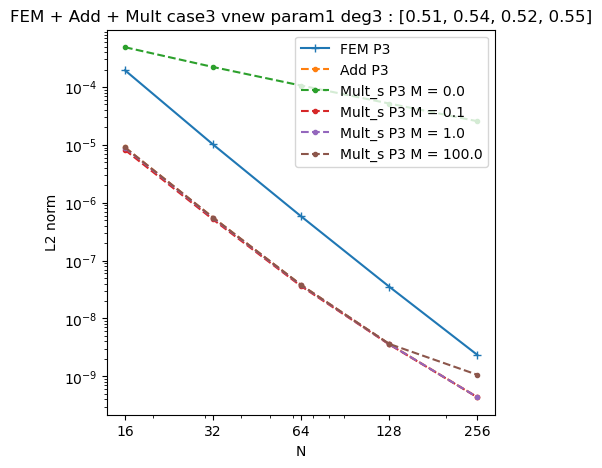

In [21]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [22]:
compare_methods.save_tab_alldeg_allM(tab_M)

Mult weak P1 M0.0 not found
Mult weak P1 M0.1 not found
Mult weak P1 M1.0 not found
Mult weak P1 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Mult weak P2 M0.0 not found
Mult weak P2 M0.1 not found
Mult weak P2 M1.0 not found
Mult weak P2 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Mult weak P3 M0.0 not found
Mult weak P3 M0.1 not found
Mult weak P3 M1.0 not found
Mult weak P3 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [10]:
from modfenics.gains.gains import GainsEnhancedFEM

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/gains/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Run errrors with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
Load reference solution for parameter  1
Load reference solution for parameter  2
Load reference solution for parameter  3
Load reference solution for parameter  4
Load reference solution for parameter  5
Load reference solution for parameter  6
Load reference solution for parameter  7
Load reference solution for parameter  8
Load reference solution for parameter  9
Load reference solution for parameter  10
Load reference solution for parameter  11
Load reference solution for parameter  12
Load reference solution for parameter  13
Load reference solution for parameter  14
Load reference solution for parameter  15
Load reference solution for parameter  16
Load reference solution for parameter  17
Load reference solution for parameter  18
Load reference solution for parameter  19
Load 

In [13]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/gains/FEM_errors_case3_vbig_degree1.csv
## Run errrors with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
Load reference solution for parameter  1
Load reference solution for parameter  2
Load reference solution for parameter  3
Load reference solution for parameter  4
Load reference solution for parameter  5
Load reference solution for parameter  6
Load reference solution for parameter  7
Load reference solution for parameter  8
Load reference solution for parameter  9
Load reference solution for parameter  10
Load reference solution for parameter  11
Load reference solution for parameter  12
Load reference solution for parameter  13
Load reference solution for parameter  14
Load reference solution for parameter  15
Load reference solution for parameter  16
L

### Run PINNs

In [ ]:
# degree = 1
# df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [17]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution for parameter  0
Load reference solution for parameter  1
Load reference solution for parameter  2
Load reference solution for parameter  3
Load reference solution for parameter  4
Load reference solution for parameter  5
Load reference solution for parameter  6
Load reference solution for parameter  7
Load reference solution for parameter  8
Load reference solution for parameter  9
Load reference solution for parameter  10
Load reference solution for parameter  11
Load reference solution for parameter  12
Load reference solution for parameter  13
Load reference solution for parameter  14
Load reference solution for parameter  15
Load reference solution for parameter  16
Load reference solution for parameter  17
Load reference solution for parameter  18
Load reference solution for parameter  19
Load

### Run Add

In [ ]:
# degree = 1
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [ ]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

### Compare methods

In [ ]:
degree = 1
df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [ ]:
# create_dataframes_all(n_params,problem,result_dir=result_dir)

In [ ]:
df_stats_Add = save_stats_deg(n_params,problem,degree,result_dir=result_dir)